In [38]:
### Importing libraries & Dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("./data/formatted_health_data.csv")

In [4]:
data.shape

(4920, 133)

In [5]:
pd.set_option('display.max_columns', None)
data.head()

,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,patches_in_throat,fatigue,weight_loss,sunken_eyes,cough,headache,chest_pain,back_pain,weakness_in_limbs,chills,joint_pain,yellowish_skin,constipation,pain_during_bowel_movements,breathlessness,cramps,weight_gain,mood_swings,neck_pain,muscle_weakness,stiff_neck,pus_filled_pimples,burning_micturition,bladder_discomfort,high_fever,nodal_skin_eruptions,ulcers_on_tongue,loss_of_appetite,restlessness,dehydration,dizziness,weakness_of_one_body_side,lethargy,nausea,abdominal_pain,pain_in_anal_region,sweating,bruising,cold_hands_and_feets,anxiety,knee_pain,swelling_joints,blackheads,foul_smell_of urine,skin_peeling,blister,dischromic _patches,watering_from_eyes,extra_marital_contacts,diarrhoea,loss_of_balance,blurred_and_distorted_vision,altered_sensorium,dark_urine,swelling_of_stomach,bloody_stool,obesity,hip_joint_pain,movement_stiffness,spinning_movements,scurring,continuous_feel_of_urine,silver_like_dusting,red_sore_around_nose,Unnamed: 73,spotting_ urination,passage_of_gases,irregular_sugar_level,family_history,lack_of_concentration,excessive_hunger,yellowing_of_eyes,distention_of_abdomen,irritation_in_anus,swollen_legs,painful_walking,small_dents_in_nails,yellow_crust_ooze,internal_itching,mucoid_sputum,history_of_alcohol_consumption,swollen_blood_vessels,unsteadiness,inflammatory_nails,depression,fluid_overload,swelled_lymph_nodes,malaise,prominent_veins_on_calf,puffy_face_and_eyes,fast_heart_rate,irritability,muscle_pain,mild_fever,yellow_urine,phlegm,enlarged_thyroid,increased_appetite,visual_disturbances,brittle_nails,drying_and_tingling_lips,polyuria,pain_behind_the_eyes,toxic_look_(typhos),throat_irritation,swollen_extremeties,slurred_speech,red_spots_over_body,belly_pain,receiving_blood_transfusion,acute_liver_failure,redness_of_eyes,rusty_sputum,abnormal_menstruation,receiving_unsterile_injections,coma,sinus_pressure,palpitations,stomach_bleeding,runny_nose,congestion,blood_in_sputum,loss_of_smell,disease
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
data.drop(columns=['Unnamed: 73'], axis = 1)
data.head()

,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,patches_in_throat,fatigue,weight_loss,sunken_eyes,cough,headache,chest_pain,back_pain,weakness_in_limbs,chills,joint_pain,yellowish_skin,constipation,pain_during_bowel_movements,breathlessness,cramps,weight_gain,mood_swings,neck_pain,muscle_weakness,stiff_neck,pus_filled_pimples,burning_micturition,bladder_discomfort,high_fever,nodal_skin_eruptions,ulcers_on_tongue,loss_of_appetite,restlessness,dehydration,dizziness,weakness_of_one_body_side,lethargy,nausea,abdominal_pain,pain_in_anal_region,sweating,bruising,cold_hands_and_feets,anxiety,knee_pain,swelling_joints,blackheads,foul_smell_of urine,skin_peeling,blister,dischromic _patches,watering_from_eyes,extra_marital_contacts,diarrhoea,loss_of_balance,blurred_and_distorted_vision,altered_sensorium,dark_urine,swelling_of_stomach,bloody_stool,obesity,hip_joint_pain,movement_stiffness,spinning_movements,scurring,continuous_feel_of_urine,silver_like_dusting,red_sore_around_nose,Unnamed: 73,spotting_ urination,passage_of_gases,irregular_sugar_level,family_history,lack_of_concentration,excessive_hunger,yellowing_of_eyes,distention_of_abdomen,irritation_in_anus,swollen_legs,painful_walking,small_dents_in_nails,yellow_crust_ooze,internal_itching,mucoid_sputum,history_of_alcohol_consumption,swollen_blood_vessels,unsteadiness,inflammatory_nails,depression,fluid_overload,swelled_lymph_nodes,malaise,prominent_veins_on_calf,puffy_face_and_eyes,fast_heart_rate,irritability,muscle_pain,mild_fever,yellow_urine,phlegm,enlarged_thyroid,increased_appetite,visual_disturbances,brittle_nails,drying_and_tingling_lips,polyuria,pain_behind_the_eyes,toxic_look_(typhos),throat_irritation,swollen_extremeties,slurred_speech,red_spots_over_body,belly_pain,receiving_blood_transfusion,acute_liver_failure,redness_of_eyes,rusty_sputum,abnormal_menstruation,receiving_unsterile_injections,coma,sinus_pressure,palpitations,stomach_bleeding,runny_nose,congestion,blood_in_sputum,loss_of_smell,disease
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection


In [7]:
for col in data.columns:
    data = data.rename(columns={col:col.strip()})

In [8]:
training_data = data.iloc[:, :-1]
training_labels = data['disease']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_set, test_set, train_labels, test_labels = train_test_split(training_data, training_labels, random_state =0, test_size= 0.20)

In [11]:
print('Training Set: ', len(train_set))
print('Test Set: ', len(test_set))
print('Training Labels: ', len(train_labels))
print('Test Labels: ', len(test_labels))

Training Set:  3936
Test Set:  984
Training Labels:  3936
Test Labels:  984


In [39]:
### Training model with data

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [13]:
classifier = GaussianNB()
classifier.fit(train_set, train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
predictions = classifier.predict(test_set)

In [15]:
predictions[517]

'Bronchial Asthma'

In [16]:
test_labels.iloc[517]

'Bronchial Asthma'

In [17]:
accuracy_score(test_labels, predictions)*100

100.0

In [18]:
print(classification_report(test_labels, predictions))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        22
                                   Acne       1.00      1.00      1.00        31
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        23
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        28
                   Cervical spondylosis       1.00      1.00      1.00        27
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        21
                            Common Cold       1.00      1.00      1.00        34
                           

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

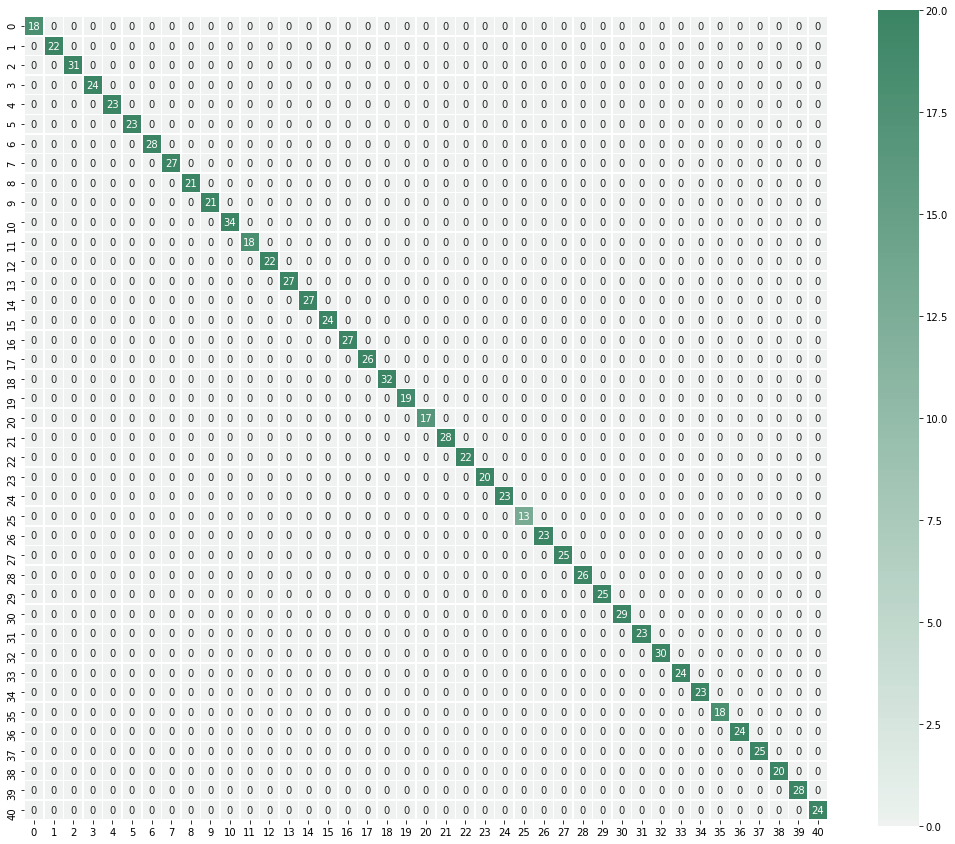

In [20]:
f, ax = plt.subplots(figsize = (18, 15))
c_matrix = confusion_matrix(test_labels, predictions)
c_map = sns.diverging_palette(220, 150, as_cmap = True)
sns.heatmap(c_matrix, center = 0, cmap=c_map, annot= True, square = True, vmax=20, linewidths= 0.5)

In [40]:
### Getting feature importance

In [23]:
# Permutation Importance
import eli5
from eli5.sklearn import PermutationImportance

C:\Users\Soumya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [24]:
perm = PermutationImportance(classifier, random_state= 0).fit(test_set, test_labels)
eli5.show_weights(perm, feature_names = test_set.columns.tolist())

Weight,Feature
0.0004 ± 0.0010,abdominal_pain
0.0002 ± 0.0008,vomiting
0.0002 ± 0.0008,joint_pain
0 ± 0.0000,loss_of_balance
0 ± 0.0000,restlessness
0 ± 0.0000,dehydration
0 ± 0.0000,dizziness
0 ± 0.0000,weakness_of_one_body_side
0 ± 0.0000,lethargy
0 ± 0.0000,nausea


In [41]:
### Prdeicting with new values

In [25]:
symptoms_dict = {}
for index, symptom in enumerate(training_data):
    symptoms_dict[symptom] = index

In [26]:
symptoms_dict

{'itching': 0,
 'skin_rash': 1,
 'continuous_sneezing': 2,
 'shivering': 3,
 'stomach_pain': 4,
 'acidity': 5,
 'vomiting': 6,
 'indigestion': 7,
 'muscle_wasting': 8,
 'patches_in_throat': 9,
 'fatigue': 10,
 'weight_loss': 11,
 'sunken_eyes': 12,
 'cough': 13,
 'headache': 14,
 'chest_pain': 15,
 'back_pain': 16,
 'weakness_in_limbs': 17,
 'chills': 18,
 'joint_pain': 19,
 'yellowish_skin': 20,
 'constipation': 21,
 'pain_during_bowel_movements': 22,
 'breathlessness': 23,
 'cramps': 24,
 'weight_gain': 25,
 'mood_swings': 26,
 'neck_pain': 27,
 'muscle_weakness': 28,
 'stiff_neck': 29,
 'pus_filled_pimples': 30,
 'burning_micturition': 31,
 'bladder_discomfort': 32,
 'high_fever': 33,
 'nodal_skin_eruptions': 34,
 'ulcers_on_tongue': 35,
 'loss_of_appetite': 36,
 'restlessness': 37,
 'dehydration': 38,
 'dizziness': 39,
 'weakness_of_one_body_side': 40,
 'lethargy': 41,
 'nausea': 42,
 'abdominal_pain': 43,
 'pain_in_anal_region': 44,
 'sweating': 45,
 'bruising': 46,
 'cold_hands_a

In [27]:
input_vector = np.zeros(len(symptoms_dict))

In [28]:
input_vector[[symptoms_dict['irregular_sugar_level'], symptoms_dict['lethargy'], symptoms_dict['restlessness']]] = 1

In [29]:
classifier.predict([input_vector])[0]

'Diabetes '

In [42]:
### Saving the model

In [30]:
from joblib import dump, load
dump(classifier, './model/gaussian_naive_bayes.joblib')

['./model/gaussian_naive_bayes.joblib']

In [33]:
g_naive_bayes = load('./model/gaussian_naive_bayes.joblib')

In [34]:
g_naive_bayes.predict([input_vector])[0]

'Diabetes '